<a href="https://colab.research.google.com/github/Keith-LJY001/NMC5342_A0234542L/blob/main/NMC5342_A0234542L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Python Refresher and Setup

Name file + Loop and control flow task:


In [ ]:
#Loop and control flow task
#remove warnings
import os, warnings
os.environ["PYTHONWARNINGS"] = "ignore::DeprecationWarning"
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
##list of short sentences
sentences = ["Python is so hard!", "NUS Master's is expensive!", "I love NUS!"]

##loop through each sentence and print each sentence
for x in sentences:
  print(x)

In [ ]:
##Count and print the number of words using .split().
sentences = ["Python is so hard!", "NUS Master's is expensive!", "I love NUS!"]

number_words = 0
for s in sentences:
    words = s.split()
    number_words += len(words)

print(number_words)

11


In [ ]:
##Checks whether the sentence contains the word "Python"

for s in sentences:
  if "python" in s.lower():
    print("Yes, contains.")
  else:
    print("No, does not contain.")

Yes, contains.
No, does not contain.
No, does not contain.


##Function Task

In [ ]:
#Function Task

In [ ]:
#first, import re for regular expressions
import re

# Use re.findall() to find hashtags or mentions in the text
def find_stuff(text):
  stuff = re.findall(r"#\w+|@\w+", text)

#return the 'stuff', which are hashtags and mentions
  return stuff

#using the function
print(find_stuff("I love #AI and @OpenSource!"))

#Part 2: Data Familiarization and Preparation

Load the provided .csv dataset using pandas.read_csv().

In [ ]:
from google.colab import files
uploaded = files.upload()
#my Full_Dataset file contains 1073 Reddit comments related to
#immigration in Singapore (All between 2024-2025)

Saving scraped_Reddit_Dataset.csv to scraped_Reddit_Dataset (2).csv


In [ ]:
import pandas as pd

#my dataset is called Reddit_Dataset.csv
df = pd.read_csv("scraped_Reddit_Dataset.csv")

#see first few rows
df.head()

,comment_id,parent_id,author,score,created_utc,Time/Date,body
0,m6ln2mf,t3_1hz0dd1,AutoModerator,1,1736615033,12/01/2025 01:03,Articles from this site may be behind a paywal...
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642,504,1736642766,12/01/2025 08:46,They are missing the point. I believe Singapor...
2,m6oyy85,t3_1hz0dd1,jeffrey745,55,1736654647,12/01/2025 12:04,I know of some foreigners here who have been h...
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321,30,1736646960,12/01/2025 09:56,Look who's talking! Integration of the migr...
4,m6ouyy4,t3_1hz0dd1,Katashi90,29,1736653085,12/01/2025 11:38,If he still doesn't understand how far deep we...


##Content Inspection

In [ ]:
#see info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comment_id   1072 non-null   object
 1   parent_id    1072 non-null   object
 2   author       975 non-null    object
 3   score        1072 non-null   int64 
 4   created_utc  1072 non-null   object
 5   Time/Date    1072 non-null   object
 6   body         1071 non-null   object
dtypes: int64(1), object(6)
memory usage: 58.8+ KB


In [ ]:
#see description
df.describe()

,score
count,1072.000000
mean,15.101679
std,45.461385
min,-159.000000
25%,1.000000
50%,3.000000
75%,12.000000
max,600.000000


##Identify key columns

In [ ]:
#key columns
df.head()

#My dataset contains comment_id, parent_id, author,
#score (upvotes/downvotes), created_utc, Time/Date, body (comments)

,comment_id,parent_id,author,score,created_utc,Time/Date,body
0,m6ln2mf,t3_1hz0dd1,AutoModerator,1,1736615033,12/01/2025 01:03,Articles from this site may be behind a paywal...
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642,504,1736642766,12/01/2025 08:46,They are missing the point. I believe Singapor...
2,m6oyy85,t3_1hz0dd1,jeffrey745,55,1736654647,12/01/2025 12:04,I know of some foreigners here who have been h...
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321,30,1736646960,12/01/2025 09:56,Look who's talking! Integration of the migr...
4,m6ouyy4,t3_1hz0dd1,Katashi90,29,1736653085,12/01/2025 11:38,If he still doesn't understand how far deep we...


##Check for missing or duplicate entries

In [ ]:
#checking for null values, will have to drop null rows later
df.isnull().sum()

,0
comment_id,0
parent_id,0
author,97
score,0
created_utc,0
Time/Date,0
body,1


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

##Generate simple descriptive summaries

In [ ]:
#Number of total comments/posts
print(len(df))

1072


In [ ]:
# Date range covered

# Convert the string dates into datetime objects
df['Time/Date'] = pd.to_datetime(df['Time/Date'],
 format='%d/%m/%Y %H:%M')

# Print date range
print(
    "Date range covered:",
    df['Time/Date'].min(),
    "to",
    df['Time/Date'].max()
)


Date range covered: 2024-03-01 01:13:00 to 2025-08-21 21:37:00


In [ ]:
#Top 5 most active users
#in my dataset, the users are known as authors

most_active_users = df['author'].value_counts().head(5)
print(most_active_users)

author
OkAdministration7880    24
bukitbukit              20
Historical_Drama_525    15
KagenTheGOATcuck        14
sengleong88             13
Name: count, dtype: int64


##Summarizing observations.

What stands out?

What might need cleaning or transformation later?


In [ ]:
##Summary of observations

#1. AutoModerator (Reddit Bot) has posts included in scraped data -
#I should exclude the bot comments during the cleaning process

#2. There are 98 null values (97 from Author, 1 from Body) -
#I should exclude them during the cleaning process

#3. The Score column is useful for further analysis as higher upvotes -
#would refer to greater approval amongst Reddit users.
#And negative upvotes would mean greater disapproval.
#Sentiment analysis will be useful in drawing insights later -
#e.g. do more upvoted posts tend to have negative or positive sentiments?

#4. For the top 5 active users, it will be fascinating to see -
#if the majority of their posts have negative or positive sentiments
#related to immigration.

#Part 3: Data Cleaning and Keyword Analysis

Load data

##Load Data
Import Libraries

1.2 Read CSV File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scraped_Reddit_Dataset.csv to scraped_Reddit_Dataset (3).csv


In [ ]:
import pandas as pd
df = pd.read_csv("scraped_Reddit_Dataset.csv")
df.head()

,comment_id,parent_id,author,score,created_utc,Time/Date,body
0,m6ln2mf,t3_1hz0dd1,AutoModerator,1,1736615033,12/01/2025 01:03,Articles from this site may be behind a paywal...
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642,504,1736642766,12/01/2025 08:46,They are missing the point. I believe Singapor...
2,m6oyy85,t3_1hz0dd1,jeffrey745,55,1736654647,12/01/2025 12:04,I know of some foreigners here who have been h...
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321,30,1736646960,12/01/2025 09:56,Look who's talking! Integration of the migr...
4,m6ouyy4,t3_1hz0dd1,Katashi90,29,1736653085,12/01/2025 11:38,If he still doesn't understand how far deep we...


##Remove unwanted elements


In [ ]:
##Drop nulls first
print(df.columns)
df = df.dropna(subset = ['body'])
print(len(df))

Index(['comment_id', 'parent_id', 'author', 'score', 'created_utc',
       'Time/Date', 'body'],
      dtype='object')
1071


In [ ]:
##Drop bot comments
#Essentially, as long as author is 'AutoModerator' or
#body text states that it is a bot

df = df[~(
    (df['author'].str.lower() == 'automoderator') |
    (df['body'].str.contains('I am a bot, and this action was performed automatically.', case=False, na=False))
)]

#drop deleted comments
df = df[~df['body'].str.lower().eq('deleted')]

print("Remaining rows:", len(df))

Remaining rows: 1070


In [ ]:
##Removing URLs
#delete links like "https:", "http:" or "www."
#match case-insensitive so "HTTP:" also removed
import re
url_re = re.compile(r"(https?://\S+|www\.\S+)", flags=re.IGNORECASE)
df['body'] = df['body'].astype(str).apply(lambda x: url_re.sub(" ", x))

In [ ]:
##remove extra spaces
#replace multiple spaces with single space
#remove leading white spaces
multispace_re = re.compile(r"\s+")
df['body'] = df['body'].apply(lambda x: multispace_re.sub(" ", x))
df['body'] = df['body'].str.strip()

In [ ]:
##remove extra or weird punctuation
#but keep certain punctuation like "!", "?", etc.
punct_re = re.compile(r"[^0-9A-Za-z\s\.\,\!\?\-\$\#@]")
df['body'] = df['body'].astype(str).apply(lambda x: punct_re.sub(" ", x))

#may cause more white spaces to appear after this, so re-clean
df['body'] = df['body'].apply(lambda x: multispace_re.sub(" ", x)).str.strip()

##Apply text preprocessing using nltk or spaCy


In [ ]:
#Install required packages for text preprocessing using nltk or spaCy
!pip install nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Using spaCy
nlp = spacy.load('en_core_web_sm') #Load the small English model

#define function that takes one string and returns a cleaned version
#lowercase all text and ensure they are strings
#Tokenize, lemmatize through spaCy
#convert tokenenized list back to single-spaced separated string
def clean_text_spacy(text):
    doc = nlp(str(text).lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens)

#Applies function to every row in the body column.
#Creates new column cleaned_text with the processed text.

df['cleaned_text'] = df['body'].apply(clean_text_spacy)

#Check results of spaCy
df[['body', 'cleaned_text']].head(10)


,body,cleaned_text
1,They are missing the point. I believe Singapor...,miss point believe singaporeans accept new com...
2,I know of some foreigners here who have been h...,know foreigner year study poly uni work barely...
3,Look who s talking! Integration of the migrant...,look s talk integration migrant local key bear...
4,If he still doesn t understand how far deep we...,doesn t understand far deep need ask overall p...
5,Build more housing first. Then talk.,build housing talk
6,Then we serve NS for fuck?,serve ns fuck
7,how far are we from 6.9 million? brace yoursel...,far million brace guy
8,But we must also stand firmly against nativism...,stand firmly nativism xenophobia welcome new a...
9,Ownself import so indiscriminately until the w...,ownself import indiscriminately social fabric ...
10,deleted,delete


##Word frequency table & word cloud

In [ ]:
#install wordcloud package
!pip install wordcloud


In [ ]:
#import necessary packages
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
from collections import Counter

#Combine cleaned text into one big string
all_words = " ".join(df['cleaned_text'].astype(str))

#Split into individual words
words = all_words.split()

#Remove meaningless fragments (initial output revealed fragmented words)
extra_stopwords = {'s', 't', 'don', 'im', 'll', 've', 're', 'm'}
valid_words = [w for w in words if w not in extra_stopwords and len(w) > 2 and w.isalpha()]

#Count word frequencies
word_freq = Counter(valid_words)

#convert to dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

#Display top 20 words
word_freq_df.head(20)


,word,frequency
152,singapore,231
89,like,200
222,citizen,186
77,country,172
5,new,171
82,people,166
30,local,143
438,china,133
599,chinese,132
20,work,101


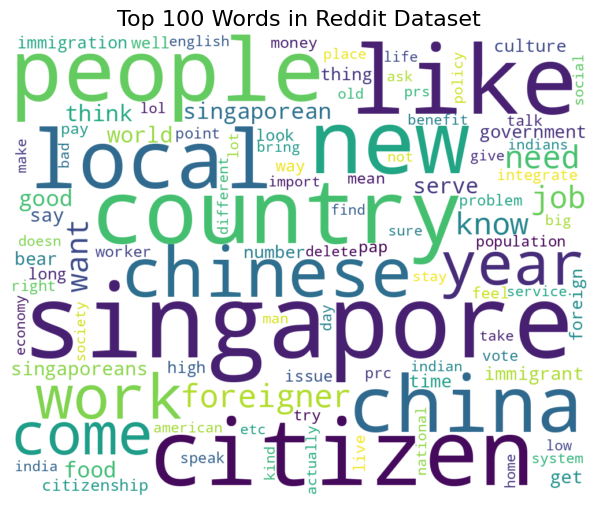

In [ ]:


#Convert frequency DataFrame to a dictionary
freq_dict = dict(zip(word_freq_df['word'], word_freq_df['frequency']))

#Generate word cloud
wordcloud = WordCloud(
    width=1000,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=100,
    random_state=42
).generate_from_frequencies(freq_dict)

#Wordcloud display
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 100 Words in Reddit Dataset", fontsize=16)
plt.show()


In [ ]:
#Calculate TF–IDF scores with TfidfVectorizer(sklearn.feature_extraction.text)
from sklearn.feature_extraction.text import TfidfVectorizer



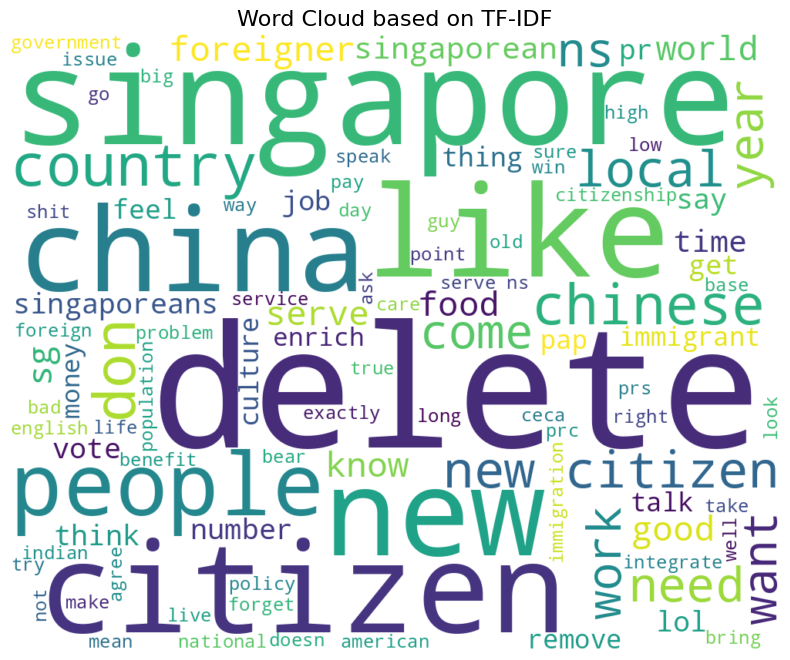

In [ ]:
import numpy as np

# TF-IDF word clouds from df['clean_comment']
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['cleaned_text'].fillna("").astype(str).tolist()

#Build TF-IDF matrix
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.9,
    sublinear_tf=True,
    norm="l2",
    stop_words=None
)
X = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

#Corpus-level TF-IDF word cloud
term_scores = np.asarray(X.sum(axis=0)).ravel()
weights_corpus = {vocab[i]: float(term_scores[i]) for i in range(len(vocab))}

wc = WordCloud(width=1000, height=800, background_color="white", max_words=100
               ,colormap='viridis')
wc = wc.generate_from_frequencies(weights_corpus)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud based on TF-IDF", fontsize=16)
plt.show()


##Calculate TF–IDF scores

In [ ]:
#average (or sum) TF–IDF for each term
avg_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_terms_df = (
    pd.DataFrame({'term': vocab, 'avg_tfidf': avg_tfidf})
      .sort_values('avg_tfidf', ascending=False)
      .reset_index(drop=True)
)

#show top 20 distinctive words/phrases
top_terms_df.head(20)


,term,avg_tfidf
0,delete,0.023780
1,singapore,0.013771
2,like,0.012324
3,citizen,0.012100
4,new,0.011355
5,china,0.010283
6,people,0.009815
7,country,0.009720
8,don,0.009580
9,chinese,0.008882


##Findings

Top recurring words

Themes

Framings

In [ ]:
#Interpret your findings:
#What are the top recurring words? Themes or framing?

##Findings

#Recurring high-weight terms:
#singapore, citizen, chinese, foreigner, local, ns, work

#Discussions around national identity, immigration, and employment.
#Netizens like discussed how national identity is framed in the local context
#(via ns, being a singaporean citizen, etc.)
#versus how immigrants are coming in with different identities (notably China)

#Compound terms (bigrams) like "new citizen"
#Indicates conversation about naturalisation & integration.

3#Dropped generic words:
#words like like, know, think
#TF-IDF filters these out because they don’t define any single thread.

##interestingly, discourse centred around Chinese nationals (from China)
#but not on Indians?

# count total mentions of "india" or "indian" (case-insensitive)
total_mentions = df['cleaned_text'].str.lower().str.count(r'\bindia[n]?\b').sum()
print(f"Total mentions of 'India' or 'Indian': {int(total_mentions)}")
#In contrast, China and Chinese were mentioned 133 and 132 times respectively
#this trend shows that China immigration is a bigger topic of discourse
#as compared to India immigration

Total mentions of 'India' or 'Indian': 64


#Part 4: Sentiment and Topic Modeling

Sentiment Analysis

In [ ]:
#Install necessary libraries and packages
!pip -q install textblob vaderSentiment
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
#selecting column with text I want to analyse using vader
TEXT_COL = 'cleaned_text'
POLARITY_ENGINE = 'textblob'

In [ ]:
#Use textblob to compute polarity, subjectivity
def compute_polarity(text: str) -> float:

    if POLARITY_ENGINE == 'textblob':
        return TextBlob(text).sentiment.polarity

def compute_subjectivity(text: str) -> float:
    return TextBlob(text).sentiment.subjectivity

#Apply polarity and subjectivity
df['polarity'] = df['cleaned_text'].apply(compute_polarity)
df['subjectivity'] = df['cleaned_text'].apply(compute_subjectivity)

df[['polarity', 'subjectivity']].describe()


,polarity,subjectivity
count,1070.000000,1070.000000
mean,0.052600,0.348206
std,0.238093,0.293870
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.369350
75%,0.136364,0.550000
max,0.800000,1.000000


In [ ]:
#label sentiment using Vader
def label_sentiment(p: float) -> str:
    # VADER common practice: >0.05 positive, < -0.05 negative, else neutral
    if p > 0.05:
        return 'positive'
    elif p < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['polarity'].apply(label_sentiment)
df['sentiment_label'].value_counts()


,count
sentiment_label,
neutral,488
positive,398
negative,184


/tmp/ipython-input-2436416891.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])


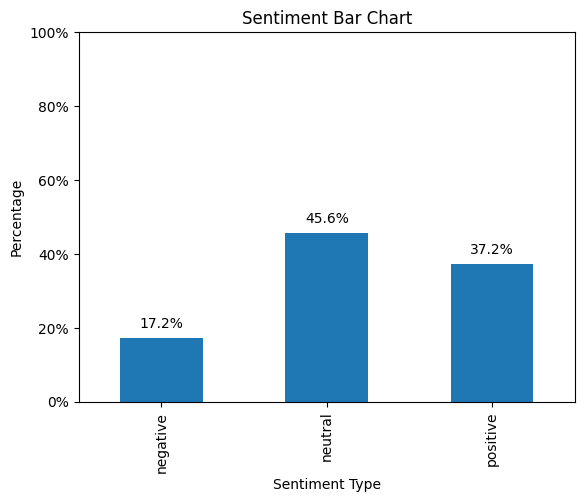

In [ ]:
#visualise results with bar chart (in percentages)

prop = df['sentiment_label'].value_counts(normalize=True).reindex(['negative','neutral','positive']).fillna(0)*100

prop.plot(kind='bar')
plt.title('Sentiment Bar Chart')
plt.xlabel('Sentiment Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])
for i, value in enumerate(prop):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()


##Topic Modeling (LDA)

In [ ]:
#installations

!pip -q install gensim pyLDAvis==3.4.1

import pandas as pd
import numpy as np
import re
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
#text column
TEXT_COL = 'cleaned_text'
#make cleaned_tokens column for topic modeling later
df['cleaned_tokens'] = df['cleaned_text'].apply(lambda x: x.split())


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
#Tokenise for modeling
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser

stop_words = set(stopwords.words('english'))

TEXT_COL = 'cleaned_text'
TOKENS_COL = 'cleaned_tokens'

def tokenize(text):
    #Lowercase + tokenize + remove stopwords + short words
    return [w for w in simple_preprocess(str(text), deacc=True)
            if w not in stop_words and len(w) > 2]

if TOKENS_COL in df.columns:
    tokens = df[TOKENS_COL].apply(lambda x: x if isinstance(x, list) else []).tolist()
else:
    assert TEXT_COL in df.columns, f"Column '{TEXT_COL}' not found!"
    #Apply tokeniser to cleaned_text
    tokens = df[TEXT_COL].astype(str).apply(tokenize).tolist()
    #store the tokens back into df
    df[TOKENS_COL] = tokens

#bigrams (phrases like "china migration")
bigram = Phrases(tokens, min_count=5, threshold=10)
bigram_phraser = Phraser(bigram)
tokens_bi = [bigram_phraser[doc] for doc in tokens]

#check first two tokenised docs
tokens_bi[:2]



[['miss',
  'point',
  'believe',
  'singaporeans',
  'accept',
  'new',
  'comer',
  'willing',
  'integrate',
  'culture',
  'civic',
  'behavior',
  'way',
  'round'],
 ['know',
  'foreigner',
  'year',
  'study',
  'poly',
  'uni',
  'work',
  'barely',
  'integrate',
  'sg',
  'society',
  'behaviour',
  'mindset',
  'different']]

In [ ]:
#corpus (bag of words) and dictionary
#Build dictionary, then filter to reduce noise
dictionary = corpora.Dictionary(tokens_bi)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

#Bag of words corpus(token_id, token_count)
corpus = [dictionary.doc2bow(doc) for doc in tokens_bi]

len(dictionary), len(corpus)


(797, 1070)

In [ ]:
import numpy as np

n_docs = len(corpus)
n_tokens = len(dictionary)
nnz = sum(len(bow) for bow in corpus)

print(f"docs={n_docs:,} | vocab={n_tokens:,} | total nonzeros={nnz:,}")


docs=1,070 | vocab=797 | total nonzeros=11,322


In [ ]:
#Train LDA
from gensim import models
import os, time

SEED = 42
workers = max(1, (os.cpu_count() or 2) - 1)

t0 = time.time()
lda = models.LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    passes=8,
    iterations=100,
    chunksize=200,
    random_state=SEED,
    alpha='asymmetric',
    eta='symmetric',
    workers=workers
)
print(f"trained in {time.time()-t0:.1f}s")

#Inspect topics
for tid, topic in lda.show_topics(num_topics=5, num_words=10, formatted=False):
    words = [w for w, _ in topic]
    print(f"Topic {tid}: {', '.join(words)}")


trained in 11.6s
Topic 0: s, country, like, singapore, don_t, new_citizen, immigrant, m, year, need
Topic 1: people, american, s, want, shit, lol, good, sell, different, country
Topic 2: foreigner, job, local, serve, want, come, sg, singapore, system, don_t
Topic 3: chinese, china, food, s, singapore, like, don_t, local, culture, chinatown
Topic 4: care, t, high, include, nonsense, easy, plan, m, overseas, pass


In [ ]:
#visualise
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

#inline visualisation
pyLDAvis.enable_notebook()

#Prepare visualisation for trained LDA model
vis = gensimvis.prepare(lda, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.045473  0.056773       1        1  49.987306
1     -0.063254  0.119937       2        1  16.096255
2     -0.039699  0.113706       3        1  15.689979
3      0.294367 -0.062914       4        1  11.833584
4     -0.145942 -0.227502       5        1   6.392876, topic_info=          Term        Freq       Total Category  logprob  loglift
353    chinese  144.000000  144.000000  Default  30.0000  30.0000
259      china  130.000000  130.000000  Default  29.0000  29.0000
327       food   91.000000   91.000000  Default  28.0000  28.0000
26           s  339.000000  339.000000  Default  27.0000  27.0000
112  singapore  189.000000  189.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
17        work    9.679006   73.390938   Topic5  -4.4769   0.7241
202        get    8.623011   54.518068   Topic5  -4.5924   0.9059
65        need    7.741357   76.837100   Topic5  -4.7002   0.4549
77         run    7.403931   27.064088   Topic5  -4.7448   1.4538
792  influence    7.339931   29.642858   Topic5  -4.7535   1.3541

[312 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
741       3  0.878527        absd
710       4  0.371571  absolutely
710       5  0.650249  absolutely
284       3  0.954701         act
436       1  0.148718    actually
...     ...       ...         ...
618       2  0.937628         wtf
601       2  0.910463          ya
18        1  0.872673        year
18        2  0.056302        year
18        3  0.070377        year

[461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
#topic descriptions
def describe_topics(lda_model, k, n_words=12):
    descs = {}
    for tid, topic in lda_model.show_topics(num_topics=k, num_words=n_words, formatted=False):
        top_words = [w for w, p in topic]
        head = ', '.join(top_words[:6])
        tail = ', '.join(top_words[6:12])
        sentence = (
            f"Topic {tid} appears to focus on: {head}. "
            f"Secondary cues include: {tail}."
        )
        descs[tid] = sentence
    return descs

descs = describe_topics(lda, k=5)
descs

#Based on the top words, the topics can be broken down into:
#Topic 0: Singapore itself and citizenship
#Topic 1: Attitudes in general (informal posts? "Shit", "lol")
#Topic 2: Locals vs foreigners (National Service, local employment vs foreigners)
#Topic 3: Chinese and China (Who are the people entering Singapore?)
#Topic 4: Attitudes toward economy, migration? ("care", "nonsense", "easy")

{0: 'Topic 0 appears to focus on: s, country, like, singapore, don_t, new_citizen. Secondary cues include: immigrant, m, year, need, mean, try.',
 1: 'Topic 1 appears to focus on: people, american, s, want, shit, lol. Secondary cues include: good, sell, different, country, ve, think.',
 2: 'Topic 2 appears to focus on: foreigner, job, local, serve, want, come. Secondary cues include: sg, singapore, system, don_t, ns, one.',
 3: 'Topic 3 appears to focus on: chinese, china, food, s, singapore, like. Secondary cues include: don_t, local, culture, chinatown, malay, indian.',
 4: 'Topic 4 appears to focus on: care, t, high, include, nonsense, easy. Secondary cues include: plan, m, overseas, pass, carry, gdp.'}

In [ ]:
#sentiment was split into 488 neutral comments, 398 positive comments, and 184 negative comments
#Sentiment and topic patterns largely align

#topic 1 sounds more informal and sarcastic, which hence may be misclassified
#by TextBlob as neutral (when in reality, it is more towards mockery)

#Topics 0 and 2 are likely to produce polarised opinions especially considering
#immigration, government policy, and foreigners are controversial topics

#Topic 3 is likely to be mixed as well due to it focusing on China Chinese
#migrants as well as other ethnic groups like Malays and Indians ---
#the result may be mixed with xenophobia and cultural tensions

#Topic 4 is likely to be mixed as well since it looks at migration and possibly
#living in Singapore

#Discussions are likely polarised, not completely hostile, but consisting of
#typical Singaporean sarcasm as well as sarcasm and skepticism mixed in

#For policymakers, the clear negativitiy and frustrations at the grassroots
#indicate that more must be done for locals due to perceived slights
#when it comes to immigration and unfairness; if not, ultranationalism
#can develop as well as xenophobia. Transparent immigration policies and
#reassurances should be made toward protecting locals in terms of identity,
#jobs, and way of life.

#For NGOs, dialogues should be conducted to reduce misconceptions about
#immigration; more ought to be done to maintain harmony between locals
#and foreigners.

#For platform moderators (Reddit moderators in this case), civility reminders
#should be made to prevent outright xenophobia and echo chambers.
#constructivity should be encouraged rather than just letting outrage spiral.

#Part 5. Network Analysis


 ##User interaction network


In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import random

random.seed(42)
np.random.seed(42)
print(pd.__version__, nx.__version__)

2.2.2 3.5


In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

#read the scraped dataset from GitHub
url_csv = "https://raw.githubusercontent.com/Keith-LJY001/NMC5342_A0234542L/main/scraped_Reddit_Dataset.csv"
df = pd.read_csv(url_csv)
df.head()


,comment_id,parent_id,author,score,created_utc,Time/Date,body
0,m6ln2mf,t3_1hz0dd1,AutoModerator,1,1736615033,12/01/2025 01:03,Articles from this site may be behind a paywal...
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642,504,1736642766,12/01/2025 08:46,They are missing the point. I believe Singapor...
2,m6oyy85,t3_1hz0dd1,jeffrey745,55,1736654647,12/01/2025 12:04,I know of some foreigners here who have been h...
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321,30,1736646960,12/01/2025 09:56,Look who's talking! Integration of the migr...
4,m6ouyy4,t3_1hz0dd1,Katashi90,29,1736653085,12/01/2025 11:38,If he still doesn't understand how far deep we...


In [6]:
required_cols = ["comment_id", "parent_id", "author"] #show only the required columns
df[required_cols].head()

,comment_id,parent_id,author
0,m6ln2mf,t3_1hz0dd1,AutoModerator
1,m6o1p7h,t3_1hz0dd1,Fair-Second-642
2,m6oyy85,t3_1hz0dd1,jeffrey745
3,m6oe1hv,t3_1hz0dd1,TaskPlane1321
4,m6ouyy4,t3_1hz0dd1,Katashi90


In [8]:
#Keep only what is needed
cols = ['comment_id','parent_id','author'] + [c for c in ['link_id','submission_author','link_author','post_author'] if c in df.columns]
df = df[cols].copy()

In [10]:
#Clean IDs (strip t1_/t3_ prefixes)
def strip_kind(x):
    if pd.isna(x): return x
    s = str(x)
    return s.split('_',1)[1] if '_' in s else s

In [13]:
df['comment_id_clean'] = df['comment_id'].astype(str).apply(strip_kind)
df['parent_kind'] = df['parent_id'].astype(str).str.slice(0,2)   # 't1' or 't3'
df['parent_clean'] = df['parent_id'].astype(str).apply(strip_kind)
if 'link_id' in df.columns:
    df['link_clean'] = df['link_id'].astype(str).apply(strip_kind)


In [15]:
#map comment id to author
id_to_author = df.set_index('comment_id_clean')['author'].to_dict()

In [17]:
#link to post author
post_author_cols = [c for c in ['submission_author','link_author','post_author'] if c in df.columns]
have_true_op = bool(post_author_cols)

In [19]:
#resolving parent-author for each comment
def resolve_parent_author(row):
    kind = row['parent_kind']
    if kind == 't1':  #replying to another comment
        return id_to_author.get(row['parent_clean'])
    elif kind == 't3':  #replying to the post (OP)
        if have_true_op and 'link_clean' in row and pd.notna(row['link_clean']):
            return link_to_op.get(row['link_clean'])
        else:
            #use a per-post placeholder so can still get a network
            #If link_clean missing, key by parent_clean (the t3 id we do have)
            anchor = row['link_clean'] if 'link_clean' in row and pd.notna(row['link_clean']) else row['parent_clean']
            return f"OP:{anchor}"
    return None

df['parent_author'] = df.apply(resolve_parent_author, axis=1)

In [21]:
#Drop rows if can't resolve parent-author
edges = df.dropna(subset=['parent_author']).copy

In [25]:
#Build directed edgers: replier -> replied_to (renamed edges to interactions)
#edges was previously used in the above code
interactions = df.dropna(subset=['parent_author']).copy()
interactions = interactions.loc[:, ['author','parent_author','comment_id','parent_id']]
interactions = interactions.rename(columns={'author':'source','parent_author':'target'})
interactions = interactions.loc[interactions['source'] != interactions['target']]

##Construct an edge list using pandas or Python loops.

In [40]:
import networkx as nx

#Build the user-to-user comment network
G_user = nx.DiGraph()

for _, row in interactions.iterrows():
    u = row['source']
    v = row['target']
    if not u or not v or u == v:
        continue
    w = G_user[u][v]['weight'] + 1 if G_user.has_edge(u, v) else 1
    G_user.add_edge(u, v, weight=w)

print("Nodes:", G_user.number_of_nodes(), "Edges:", G_user.number_of_edges())

#Basic metrics
deg_w = dict(G_user.degree(weight='weight'))
nx.set_node_attributes(G_user, deg_w, "weighted_degree")

top10 = sorted(deg_w.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 by weighted degree (total replies sent+received):")
for node, score in top10:
    print(f"{node}: {score}")

#However, this shows "OP:..." which refers to the original poster's ID
#I will show the actualR Reddit authors' interactions below

Nodes: 516 Edges: 859

Top-10 by weighted degree (total replies sent+received):
OP:1j70rfe: 115
nan: 94
OP:1hz0dd1: 70
OP:1erok8i: 69
OP:1l9lca4: 42
leavingSg: 27
bukitbukit: 26
OP:1ez49pd: 25
Historical_Drama_525: 22
OkAdministration7880: 21


In [41]:
#Remove placeholder "OP:..." and NaN authors
human_nodes = [n for n in G_user.nodes if isinstance(n, str) and not n.startswith('OP:') and n != 'nan']
G_human = G_user.subgraph(human_nodes).copy()

print("Human-only network:")
print("Nodes:", G_human.number_of_nodes(), "Edges:", G_human.number_of_edges())

#Recalculate degrees
deg_w_h = dict(G_human.degree(weight='weight'))
nx.set_node_attributes(G_human, deg_w_h, "weighted_degree")

top10_h = sorted(deg_w_h.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 human authors by weighted degree (total replies sent+received):")
for node, score in top10_h:
    print(f"{node}: {score}")

#Most replied-to Redditors only ("humans only")
in_deg_w_h = dict(G_human.in_degree(weight='weight'))
top10_in_h = sorted(in_deg_w_h.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 most replied-to human authors (weighted in-degree):")
for node, score in top10_in_h:
    print(f"{node}: {score}")


Human-only network:
Nodes: 507 Edges: 483

Top-10 human authors by weighted degree (total replies sent+received):
bukitbukit: 25
leavingSg: 25
OkAdministration7880: 20
sengleong88: 20
Historical_Drama_525: 19
KagenTheGOATcuck: 18
Jiakkantan: 16
Spiritual_Contest194: 14
hatboyslim: 12
Ehehehe090: 12

Top-10 most replied-to human authors (weighted in-degree):
leavingSg: 14
jinhong91: 9
Historical_Drama_525: 9
Fair-Second-642: 8
KagenTheGOATcuck: 8
minisoo: 8
boliaostuff: 8
nooobmaster23: 8
drwackadoodles: 7
hatboyslim: 7


In [43]:
density = nx.density(G_user)
print(f"Network density: {density:.4f}")

Network density: 0.0032


##Build and visualize the graph using NetworkX:

##Compute network metrics:
##Degree centrality (who or what is most connected)
##Betweenness centrality (who bridges groups)


In [45]:
import pandas as pd

n = G_human.number_of_nodes()
#Degree centrality (unweighted, normalized by n-1)
deg_c = nx.degree_centrality(G_human)
in_deg_c  = {u: d/(n-1) for u, d in dict(G_human.in_degree()).items()}
out_deg_c = {u: d/(n-1) for u, d in dict(G_human.out_degree()).items()}

#Betweenness
betw = nx.betweenness_centrality(
    G_human,
    k=min(500, max(10, int(0.2*n))) if n > 1200 else None,
    normalized=True,
    seed=42
)

metrics = pd.DataFrame({
    "degree_centrality": pd.Series(deg_c),
    "in_degree_centrality": pd.Series(in_deg_c),
    "out_degree_centrality": pd.Series(out_deg_c),
    "betweenness_centrality": pd.Series(betw),
}).fillna(0).sort_values("degree_centrality", ascending=False)

display(metrics.head(15))


,degree_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality
bukitbukit,0.043478,0.011858,0.031621,0.006509
OkAdministration7880,0.035573,0.003953,0.031621,0.001401
sengleong88,0.035573,0.011858,0.023715,0.007229
leavingSg,0.033597,0.017787,0.015810,0.006257
Historical_Drama_525,0.033597,0.013834,0.019763,0.010970
KagenTheGOATcuck,0.031621,0.013834,0.017787,0.005262
HappiGoon,0.021739,0.009881,0.011858,0.002635
Ehehehe090,0.021739,0.009881,0.011858,0.001972
sinkie_sinkiestan,0.019763,0.007905,0.011858,0.001913
hatboyslim,0.019763,0.011858,0.007905,0.002489


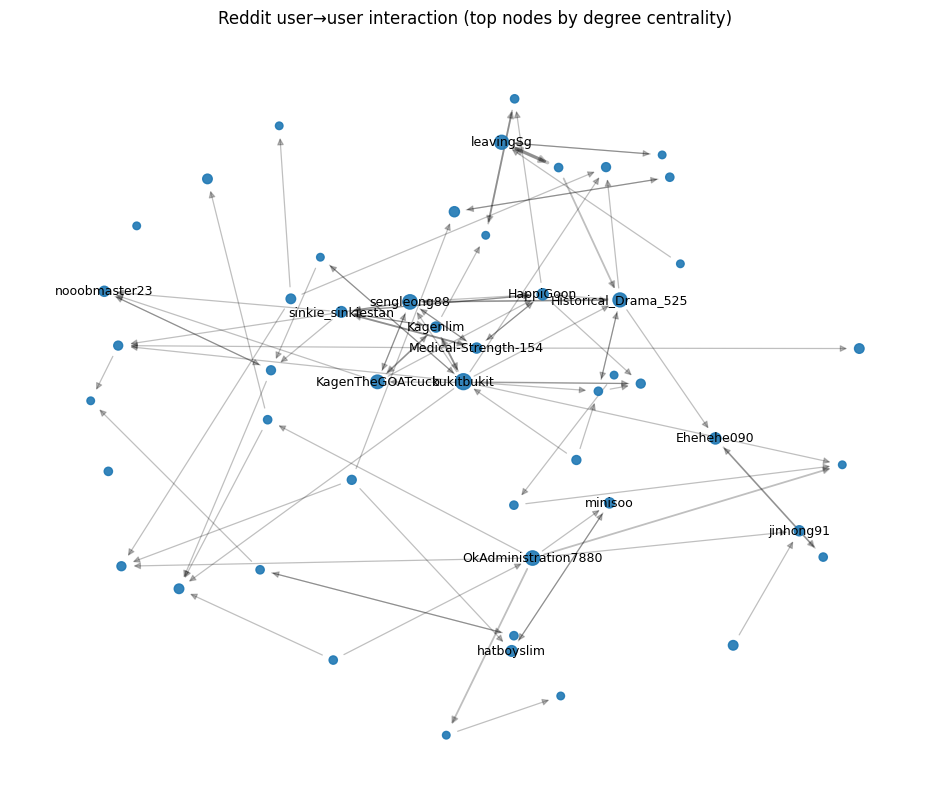

In [47]:
#visualise
import matplotlib.pyplot as plt

TOP_N = 50
top_nodes = metrics.head(TOP_N).index
H = G_human.subgraph(top_nodes).copy()

#Node sizes by degree centrality; edge widths by weight
sizes = [3000 * metrics.loc[u, "degree_centrality"] for u in H.nodes()]
edge_w = nx.get_edge_attributes(H, "weight")
max_w = max(edge_w.values()) if edge_w else 1
widths = [0.5 + 2.0*(edge_w[(u,v)]/max_w) for u,v in H.edges()]

pos = nx.spring_layout(H, k=0.6, seed=7)
plt.figure(figsize=(12,10))
nx.draw_networkx_edges(H, pos, alpha=0.25, width=widths, arrows=True, arrowstyle='-|>', arrowsize=10)
nx.draw_networkx_nodes(H, pos, node_size=sizes, alpha=0.9)
#Label only the top 15 by degree centrality to avoid clutter
label_nodes = set(metrics.head(15).index)
nx.draw_networkx_labels(H, pos, {u:u for u in H.nodes() if u in label_nodes}, font_size=9)
plt.title("Reddit user→user interaction (top nodes by degree centrality)")
plt.axis('off')
plt.show()


Plotting graph with 507 nodes and 483 edges


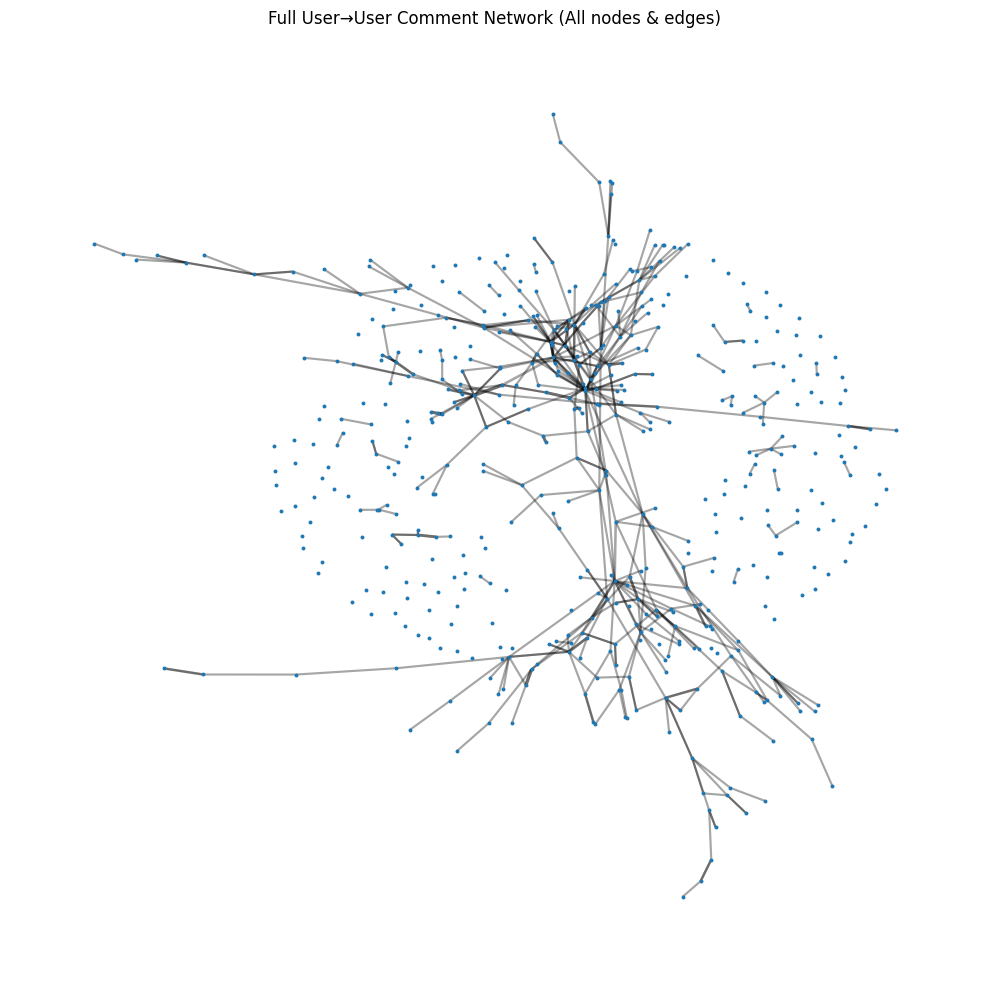

In [51]:
#plot all nodes/edges
import networkx as nx
import matplotlib.pyplot as plt
import math

# ---------- pick the graph ----------
G = G_human  # or G_user

print("Plotting graph with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

# ---------- layout (spring) ----------
# Seed for reproducibility; increase 'iterations' if layout is too clumped (costs time).
pos = nx.spring_layout(G, seed=42, iterations=50)

# ---------- edge widths from weights (log-scaled so big threads don't dominate) ----------
def width_from_w(w, base=1.0, scale=0.8):
    # width = base + scale * log(1 + w)
    return base + scale * math.log1p(max(1, float(w)))

edge_attr = nx.get_edge_attributes(G, "weight")
edge_widths = [width_from_w(edge_attr[(u, v)]) for (u, v) in G.edges()]

# ---------- draw ----------
plt.figure(figsize=(10, 10))
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.35, arrows=False)
nx.draw_networkx_nodes(G, pos, node_size=8, linewidths=0)

plt.title("Full User→User Comment Network (All nodes & edges)")
plt.axis("off")
plt.tight_layout()
plt.show()
#micro-conversations only, no links to original posters

##Community clusters

In [53]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

#Build an undirected graph that preserves summed weights in either direction
G_und = nx.Graph()
G_und.add_nodes_from(G_human.nodes())

for u, v, d in G_human.edges(data=True):
    w = d.get("weight", 1)
    if G_und.has_edge(u, v):
        G_und[u][v]["weight"] += w
    else:
        G_und.add_edge(u, v, weight=w)

#Greedy modularity communities (weighted)
communities = list(greedy_modularity_communities(G_und, weight="weight"))
print(f"Detected {len(communities)} communities.")


Detected 203 communities.


In [55]:
#Map each node to its community id
comm_map = {}
for cid, comm in enumerate(communities):
    for n in comm:
        comm_map[n] = cid

#attach as a node attribute on the directed graph
nx.set_node_attributes(G_human, comm_map, "community")

#see some mappings
list(comm_map.items())[:10]


[('Remarkable-Bug5679', 0),
 ('bbqoyster', 0),
 ('Redeptus', 0),
 ('kyrandia71', 0),
 ('Boogie_p0p', 0),
 ('schofield_revolver', 0),
 ('ilikepussy96', 0),
 ('aimless28', 0),
 ('Keitaru84', 0),
 ('kuang89', 0)]

In [56]:
import collections

sizes = collections.Counter(comm_map.values())
print("Community sizes:", dict(sizes))

#largest community (by # of nodes)
largest_cid = max(sizes, key=lambda c: sizes[c])
nodes_in_largest = [n for n, c in comm_map.items() if c == largest_cid]
len(nodes_in_largest), largest_cid


Community sizes: {0: 50, 1: 49, 2: 29, 3: 28, 4: 18, 5: 16, 6: 15, 7: 13, 8: 12, 9: 8, 10: 7, 11: 7, 12: 6, 13: 6, 14: 5, 15: 5, 16: 5, 17: 4, 18: 4, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135

(50, 0)

In [57]:
#Weighted degrees restricted to that community
in_deg_w   = dict(G_human.in_degree(nodes_in_largest, weight="weight"))
out_deg_w  = dict(G_human.out_degree(nodes_in_largest, weight="weight"))
tot_deg_w  = {n: in_deg_w.get(n,0) + out_deg_w.get(n,0) for n in nodes_in_largest}

def top10(d):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top-10 (weighted in-degree) in largest community:")
for n, s in top10(in_deg_w):  print(n, s)

print("\nTop-10 (weighted out-degree) in largest community:")
for n, s in top10(out_deg_w): print(n, s)

print("\nTop-10 (weighted total degree) in largest community:")
for n, s in top10(tot_deg_w): print(n, s)


Top-10 (weighted in-degree) in largest community:
jinhong91 9
Fair-Second-642 8
drwackadoodles 7
Familiar_Guava_2860 6
SnooDucks7091 5
elithecho 5
Anxious_Spend_9927 5
Zantetsukenz 4
SkorpionAK 3
Puzzleheaded-Dog-910 3

Top-10 (weighted out-degree) in largest community:
OkAdministration7880 18
Fenrispro 5
elithecho 5
travellingmtf 4
Redeptus 3
robson0707 3
Zantetsukenz 3
Lapsus-Stella 3
pseudotan 2
shadowlago95 2

Top-10 (weighted total degree) in largest community:
OkAdministration7880 20
elithecho 10
jinhong91 9
Fair-Second-642 8
drwackadoodles 8
Zantetsukenz 7
Fenrispro 6
travellingmtf 6
SnooDucks7091 6
Familiar_Guava_2860 6


Detected 203 communities


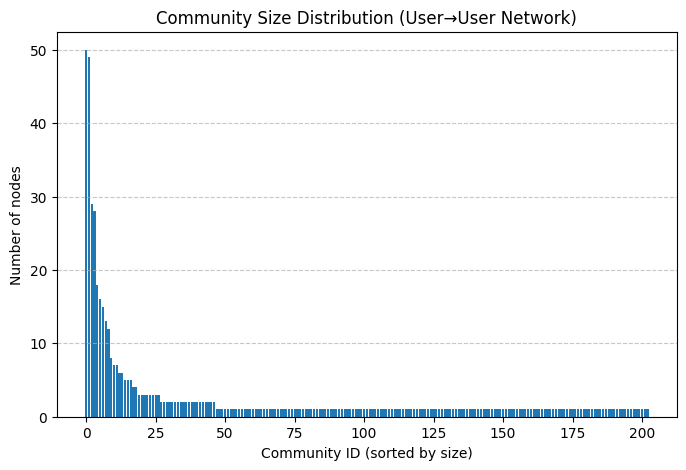

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms.community import greedy_modularity_communities

#make an undirected weighted copy for modularity
G_und = nx.Graph()
G_und.add_nodes_from(G_human.nodes())
for u, v, d in G_human.edges(data=True):
    w = d.get("weight", 1)
    if G_und.has_edge(u, v):
        G_und[u][v]["weight"] += w
    else:
        G_und.add_edge(u, v, weight=w)

#detect communities
comms = list(greedy_modularity_communities(G_und, weight="weight"))
print(f"Detected {len(comms)} communities")

#node -> community id map (attach to directed graph)
comm_map = {}
for cid, cset in enumerate(comms):
    for n in cset:
        comm_map[n] = cid
nx.set_node_attributes(G_human, comm_map, "community")

#size distribution plot (sorted by size)
sizes = Counter(comm_map.values())
sorted_sizes = sorted(sizes.items(), key=lambda x: x[1], reverse=True)
community_ids, community_sizes = zip(*sorted_sizes)

plt.figure(figsize=(8,5))
plt.bar(range(len(community_sizes)), community_sizes)
plt.xlabel("Community ID (sorted by size)")
plt.ylabel("Number of nodes")
plt.title("Community Size Distribution (User→User Network)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


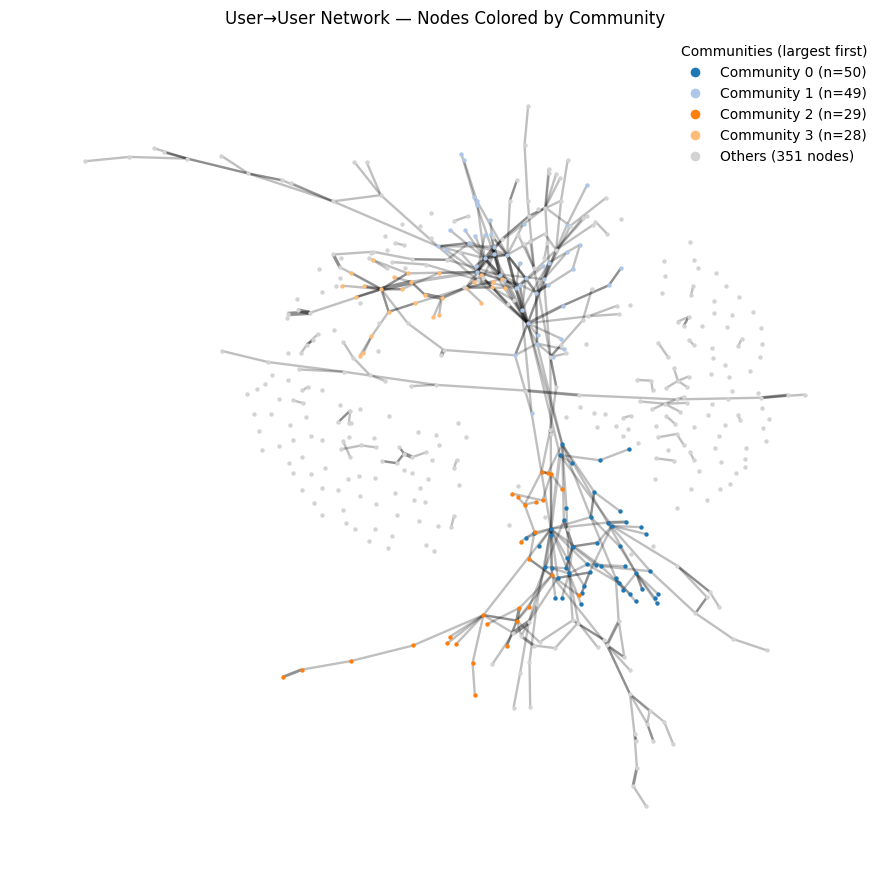

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#layout
pos = nx.spring_layout(G_human, seed=42, iterations=60)

unique_cids = sorted(set(comm_map.values()))
cmap = plt.get_cmap("tab20")  # up to 20 distinct hues
cid_to_color = {cid: cmap(i % 20) for i, cid in enumerate(unique_cids)}

#Order communities by size nd pick top-K for legend
K = 4
sorted_cids = [cid for cid, _ in sorted(sizes.items(), key=lambda x: x[1], reverse=True)]
top_cids = set(sorted_cids[:K])

plt.figure(figsize=(9,9))

#edges
eattr = nx.get_edge_attributes(G_human, "weight")
edge_w = [0.6 + 1.6*np.log1p(eattr[(u,v)]) for (u,v) in G_human.edges()]
nx.draw_networkx_edges(G_human, pos, width=edge_w, alpha=0.25, arrows=False)

#nodes community-by-community
handles, labels = [], []
for cid in sorted_cids[:K]:
    nodes_c = [n for n in G_human.nodes() if comm_map.get(n)==cid]
    nx.draw_networkx_nodes(G_human, pos, nodelist=nodes_c, node_size=10,
                           node_color=[cid_to_color[cid]], linewidths=0)
    handles.append(plt.Line2D([0],[0], marker='o', color='w',
                              markerfacecolor=cid_to_color[cid], markersize=8))
    labels.append(f"Community {cid} (n={sizes[cid]})")

#draw others
other_nodes = [n for n in G_human.nodes() if comm_map.get(n) not in top_cids]
if other_nodes:
    nx.draw_networkx_nodes(G_human, pos, nodelist=other_nodes, node_size=10,
                           node_color="lightgrey", linewidths=0)
    handles.append(plt.Line2D([0],[0], marker='o', color='w',
                              markerfacecolor='lightgrey', markersize=8))
    labels.append(f"Others ({len(other_nodes)} nodes)")

plt.legend(handles, labels, loc="upper right", frameon=False, title="Communities (largest first)")
plt.title("User→User Network — Nodes Colored by Community")
plt.axis("off")
plt.tight_layout()
plt.show()


Largest community ID: 0, size: 50


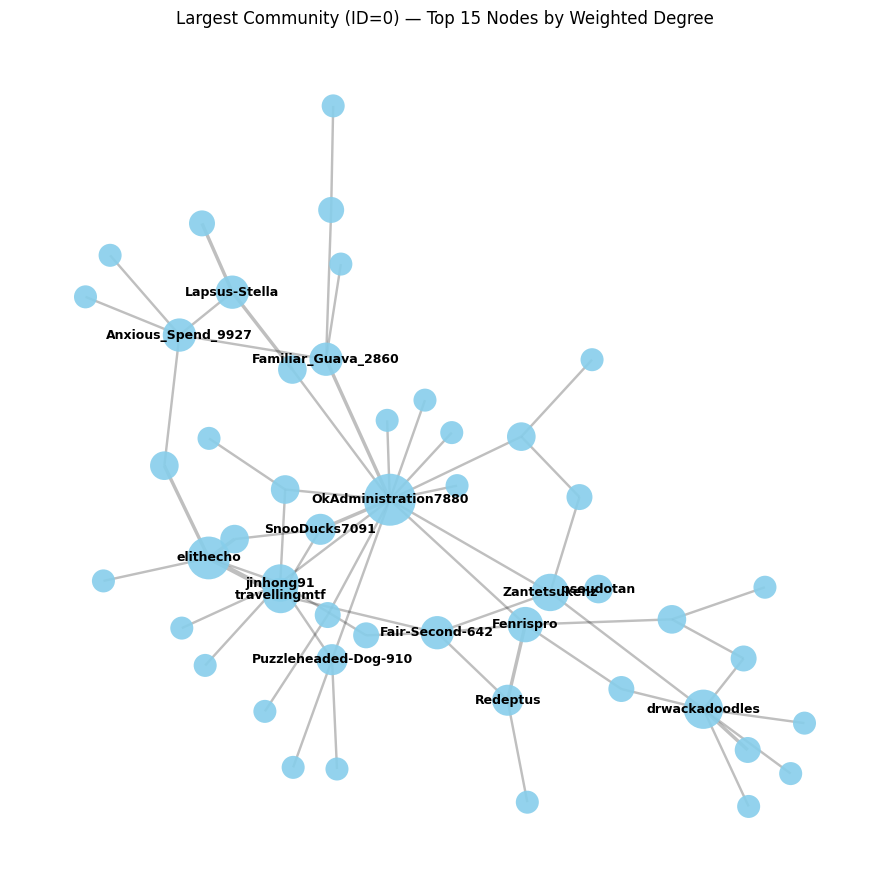

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#Identify largest community
largest_cid = max(sizes, key=lambda c: sizes[c])
nodes_in_largest = [n for n, c in comm_map.items() if c == largest_cid]
print(f"Largest community ID: {largest_cid}, size: {len(nodes_in_largest)}")

#Build an undirected subgraph
G_largest = nx.Graph()
G_largest.add_nodes_from(nodes_in_largest)
for u, v, d in G_human.edges(data=True):
    if u in nodes_in_largest and v in nodes_in_largest:
        w = d.get("weight", 1)
        if G_largest.has_edge(u, v):
            G_largest[u][v]["weight"] += w
        else:
            G_largest.add_edge(u, v, weight=w)

#Weighted degree inside the largest community
deg_w = dict(G_largest.degree(weight="weight"))
top15 = sorted(deg_w.items(), key=lambda x: x[1], reverse=True)[:15]
top_nodes = {n for n, _ in top15}

#Layout
pos = nx.spring_layout(G_largest, seed=24, iterations=80)

#Node sizes by degree (scaled), edge widths by log weight
max_deg = max(deg_w.values()) if deg_w else 1
node_sizes = [200 + 1200*(deg_w[n]/max_deg) for n in G_largest.nodes()]
eattr = nx.get_edge_attributes(G_largest, "weight")
edge_w = [0.5 + 1.8*np.log1p(eattr[(u,v)]) for (u,v) in G_largest.edges()]

plt.figure(figsize=(9,9))
nx.draw_networkx_edges(G_largest, pos, alpha=0.25, width=edge_w)
nx.draw_networkx_nodes(G_largest, pos, node_size=node_sizes, node_color="skyblue", alpha=0.9, linewidths=0)
nx.draw_networkx_labels(G_largest, pos, labels={n:n for n in top_nodes}, font_size=9, font_weight="bold")
plt.title(f"Largest Community (ID={largest_cid}) — Top 15 Nodes by Weighted Degree")
plt.axis("off")
plt.tight_layout()
plt.show()


In [68]:
import networkx as nx

# Replace G_human with your graph variable (G_user, G_human, etc.)
nx.write_graphml(G_human, "reddit_user_comment_network.graphml")
print("Saved:", "reddit_user_comment_network.graphml")



Saved: reddit_user_comment_network.graphml


##Interpret your results:
What clusters or communities emerge?
Who are the “influential nodes”?
How does structure reflect discourse fragmentation or coordination?

In [69]:
#Clusters: dataset's network is highly fragmented, composed of many disconnected conversations.
#Several moderately sized clusters do show that Redditors flock to controversial or hot topics.

#Nodes: OkAdministration7880 is the main engagement driver — likely replying to many others.
#jinhong91, Fair-Second-642, and drwackadoodles attract many direct replies.

#The discourse is highly fragmented: some localised clusters, but not global cohesion.
#Users interact mainly within only certain Reddit threads but not throughout the entire post.